## Analise de pessoas com e sem máscara usando o Keras 

Se baseando no mnist

In [1]:
!pip install tensorflow_datasets
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label


In [4]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [5]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 2s 2ms/step - loss: 0.3544 - sparse_categorical_accuracy: 0.9032 - val_loss: 0.1946 - val_sparse_categorical_accuracy: 0.9447
Epoch 2/6
469/469 [==============================] - 1s 1ms/step - loss: 0.1619 - sparse_categorical_accuracy: 0.9544 - val_loss: 0.1383 - val_sparse_categorical_accuracy: 0.9593
Epoch 3/6
469/469 [==============================] - 1s 1ms/step - loss: 0.1194 - sparse_categorical_accuracy: 0.9657 - val_loss: 0.1119 - val_sparse_categorical_accuracy: 0.9668
Epoch 4/6
469/469 [==============================] - 1s 1ms/step - loss: 0.0922 - sparse_categorical_accuracy: 0.9737 - val_loss: 0.0973 - val_sparse_categorical_accuracy: 0.9708
Epoch 5/6
469/469 [==============================] - 1s 1ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9782 - val_loss: 0.0880 - val_sparse_categorical_accuracy: 0.9752
Epoch 6/6
469/469 [==============================] - 1s 1ms/step - loss: 0.0623 - sparse_categorical_accu

## Carregando as imagens para testes

Carregando as imagens usando o Keras 

In [7]:
import random

In [8]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [9]:
dt_images=tf.keras.preprocessing.image_dataset_from_directory(
    "./dataset/dataset",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=100,
    image_size=(256, 256),
    shuffle=True,
    seed=random.randint(60, 120000),
    validation_split=0.25,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1376 files belonging to 2 classes.
Using 1032 files for training.


In [10]:
dt_images

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(256, 256,3)),
  #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  tf.keras.layers.Dense(256,activation="relu",input_shape=(256,256)),
  tf.keras.layers.Dense(2),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               50331904  
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 50,332,421
Trainable params: 50,332,421
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


In [14]:
model.fit(
    dt_images,
    epochs=24,
)

Epoch 1/24
11/11 [==============================] - 3s 221ms/step - loss: 11140.1074 - accuracy: 0.5087
Epoch 2/24
11/11 [==============================] - 3s 226ms/step - loss: 1319.6544 - accuracy: 0.5465
Epoch 3/24
11/11 [==============================] - 3s 222ms/step - loss: 545.5090 - accuracy: 0.6434
Epoch 4/24
11/11 [==============================] - 3s 218ms/step - loss: 194.9743 - accuracy: 0.7665
Epoch 5/24
11/11 [==============================] - 3s 215ms/step - loss: 105.2507 - accuracy: 0.8343
Epoch 6/24
11/11 [==============================] - 3s 216ms/step - loss: 94.0661 - accuracy: 0.8362
Epoch 7/24
11/11 [==============================] - 3s 244ms/step - loss: 51.0150 - accuracy: 0.8953
Epoch 8/24
11/11 [==============================] - 3s 245ms/step - loss: 44.6099 - accuracy: 0.8934
Epoch 9/24
11/11 [==============================] - 3s 247ms/step - loss: 21.0671 - accuracy: 0.9322
Epoch 10/24
11/11 [==============================] - 3s 248ms/step - loss: 17.1067 

In [15]:
model

In [16]:
image=tf.keras.preprocessing.image.load_img(
   "./eu.jpg", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)

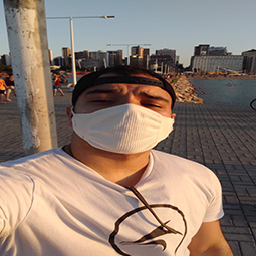

In [17]:
image

In [18]:
import numpy as np
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

In [19]:
predictions = model.predict(input_arr)

In [20]:
predictions

array([[1.]], dtype=float32)

In [21]:
image=tf.keras.preprocessing.image.load_img(
   "./eu_sem_mascara.jpg", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)

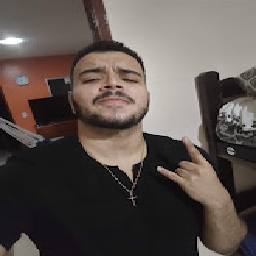

In [22]:
image

In [23]:
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
model.predict(input_arr)

array([[1.]], dtype=float32)

## Modelo Convolucional

In [31]:
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)), 
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(1, activation='sigmoid')  
])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 128)     

In [36]:
#model.compile(
#    optimizer="adam",
#    loss="binary_crossentropy",
#    metrics=["accuracy"],
#)

from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [37]:
model.fit(
    dt_images,
    epochs=15,
)

Epoch 1/15
11/11 [==============================] - 36s 3s/step - loss: 2.9668 - acc: 0.8857
Epoch 2/15
11/11 [==============================] - 37s 3s/step - loss: 0.0044 - acc: 1.0000
Epoch 3/15
11/11 [==============================] - 33s 3s/step - loss: 0.0015 - acc: 1.0000
Epoch 4/15
11/11 [==============================] - 34s 3s/step - loss: 6.9536e-04 - acc: 1.0000
Epoch 5/15
11/11 [==============================] - 33s 3s/step - loss: 0.0040 - acc: 0.9981
Epoch 6/15
11/11 [==============================] - 37s 3s/step - loss: 4.2843e-04 - acc: 1.0000
Epoch 7/15
11/11 [==============================] - 38s 3s/step - loss: 1.0229e-04 - acc: 1.0000
Epoch 8/15
11/11 [==============================] - 36s 3s/step - loss: 0.0378 - acc: 0.9913
Epoch 9/15
11/11 [==============================] - 36s 3s/step - loss: 1.2150 - acc: 0.9244
Epoch 10/15
11/11 [==============================] - 37s 3s/step - loss: 0.0030 - acc: 1.0000
Epoch 11/15
11/11 [==============================] - 39s 

In [38]:
image=tf.keras.preprocessing.image.load_img(
   "./eu.jpg", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
model.predict(input_arr)

array([[1.9058628e-09]], dtype=float32)

In [39]:
image=tf.keras.preprocessing.image.load_img(
   "./eu_sem_mascara.jpg", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
model.predict(input_arr)

array([[0.9870625]], dtype=float32)